In [1]:
from numpy import array, dot, linspace, random
from scipy.special import factorial
from math import fabs
import matplotlib.pyplot as plt


In [2]:
random.seed(42)

noise_std = 0.7
nb_samples = 20000

In [3]:
def f0(t,K,n):
    return dot(t**linspace(0, n-1, n),K)

In [4]:
def df0(t,K,n,d):
    return dot(t**linspace(0, n-1-d, n-d),K[d:]*(factorial(linspace(0, n-1, n))[d:] / factorial(linspace(0, n-1-d, n-d))))

In [5]:
n = 5
K = array([5, -0.004, 0.0003, -0.00002, 0.000001])[:n]

In [6]:
ts = [0] + list(map(lambda x: x , linspace(1, nb_samples, nb_samples)))

In [7]:
dts = list(map(lambda x, y: y-x, ts,ts[1:]))

In [8]:
fs = list(map(lambda t: f0(t,K,n) + random.normal(0, noise_std), ts))

In [9]:
z = [0 for _ in range(n)]
z[0] = fs[0]
zs = [[z[j]] for j in range(n)]

es = [[] for _ in range(n)]
aes = [[] for _ in range(n)]
ks = [[] for _ in range(n)]
ls = []
for j in range(n):
    es[j].append(z[j] - df0(0,K,n,j))
    aes[j].append(fabs(z[j] - df0(0,K,n,j)))
    ls.append(linspace(0, n-1-j, n-j))
    ks[j].append(0)

fctrls = []
for m in range(1,n+1):
    fctrls.append((factorial(n+m-1)/factorial(m)/factorial(n-m))*n)

for i in range(1,len(ts)):
    t = ts[i]
    dt = t - ts[i-1]
    #print('t=',ts[i], 'f=', fs[i])#, 't_=',ts[i-1], 'f_=', fs[i-1], 'dt=', dt)
    
    eps = fs[i] - dot(dt**ls[0], z[:] / factorial(ls[0]))
    z_ = [dot(dt**ls[m-1] / factorial(ls[m-1]), z[(m-1):]) + (dt*fctrls[m-1]/(t**m))*eps for m in range(1,n+1)]
    k_ = [dot((0-t)**ls[j] / factorial(ls[j]), z_[j:]) / factorial(j) for j in range(n)]
    for j in range(n):
        z[j] = z_[j]
        zs[j].append(z[j])
        es[j].append(z[j] - df0(t,K,n,j))
        aes[j].append(fabs(es[j][-1:][0]))
        ks[j].append(k_[j])
        #if n<=n:
        #    print('\t', 'z[',j,']=', z[j], '\t', 'e[',j,']', es[j][i-1])

interp = []
t = ts[-1]
for i in range(len(ts)):
    tau = ts[i]
    interp.append(dot((tau - t)**ls[0] / factorial(ls[0]), z[:]))

extra_prev_f0 = []
extra_prev_z0 = []
extra_prev_ts = []
for tau in range(-100,0):
    extra_prev_ts.append(tau)
    extra_prev_f0.append(f0(tau,K,n))
    extra_prev_z0.append(dot((tau - t)**ls[0] / factorial(ls[0]), z[:]))

extra_post_f0 = []
extra_post_z0 = []
extra_post_ts = []
for tau in range(int(t)+1,int(t)+100):
    extra_post_ts.append(tau)
    extra_post_f0.append(f0(tau,K,n))
    extra_post_z0.append(dot((tau - t)**ls[0] / factorial(ls[0]), z[:]))

#print("f0[t]",f0(t,K,n));
print("t",t);
print("f0[20000]",5-0.004*20000+0.0003*20000*20000-0.00002*20000*20000*20000+0.000001*20000*20000*20000*20000);
print("z=",z)
print("z0[t]-f0[t]",z[0] - f0(t,K,n));
    
for j in range(n):
    print("K^",j,"=", ks[j][-1]," K",j,"=", K[j])


t 20000.0
f0[20000] 159840119925.0
z= [159840119925.68204, 31976011.996803068, 4797.60060041989, 0.4798800001117842, 2.4000000012554594e-05]
z0[t]-f0[t] 0.682037353515625
K^ 0 = 8.250274658203125  K 0 = 5.0
K^ 1 = -0.005977354943752289  K 1 = -0.004
K^ 2 = 0.000300347562188108  K 2 = 0.0003
K^ 3 = -2.0000023217947582e-05  K 3 = -2e-05
K^ 4 = 1.000000000523108e-06  K 4 = 1e-06


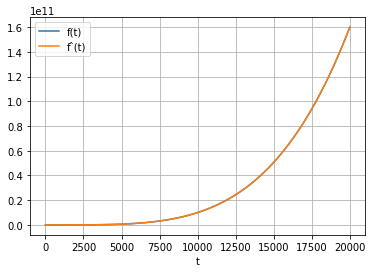

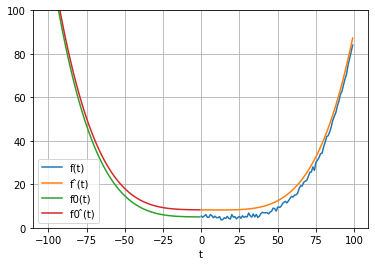

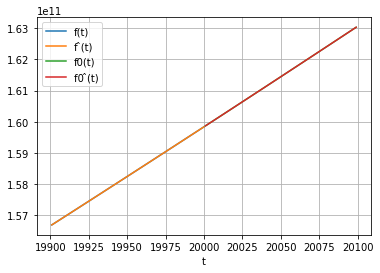

In [10]:
fig, ax = plt.subplots()
ax.plot(ts, fs, label='f(t)')
ax.plot(ts, interp, label='f ̂(t)')
ax.set_xlabel("t")
ax.grid();
plt.legend()
plt.show();

fig, ax = plt.subplots()
ax.set_ylim(0, 100)
x = 100
ax.plot(ts[:x], fs[:x], label='f(t)')
ax.plot(ts[:x], interp[:x], label='f ̂(t)')
ax.plot(extra_prev_ts, extra_prev_f0, label='f0(t)')
ax.plot(extra_prev_ts, extra_prev_z0, label='f0 ̂(t)')
ax.set_xlabel("t")
ax.grid();
plt.legend()
plt.show();

fig, ax = plt.subplots()
x = -100
ax.plot(ts[x:], fs[x:], label='f(t)')
ax.plot(ts[x:], interp[x:], label='f ̂(t)')
ax.plot(extra_post_ts, extra_post_f0, label='f0(t)')
ax.plot(extra_post_ts, extra_post_z0, label='f0 ̂(t)')
ax.set_xlabel("t")
ax.grid();
plt.legend()
plt.show();

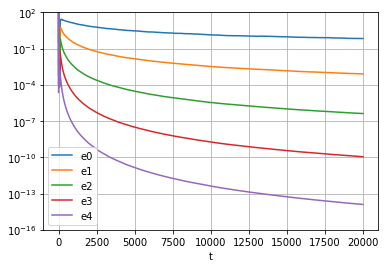

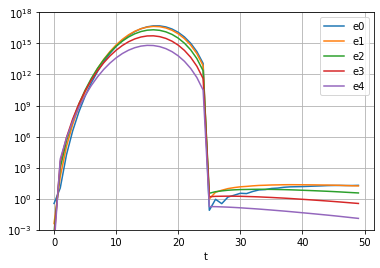

In [11]:
fig, ax = plt.subplots()#figsize=(14, 8))
#ax.set_ylim(1e-14, 1e0)
ax.set_ylim(1e-16, 1e2)
for j in range(n):
    ax.plot(ts, aes[j], label='e'+str(j))#, color='black', linestyle="x")
#ax.set_title('log errors')
#ax.grid(linestyle=":")
#ax.set_axisbelow(True)
ax.grid();
ax.set_xlabel("t")
ax.set_yscale('log')
plt.legend()
plt.show();


fig, ax = plt.subplots()#figsize=(14, 8))
#ax.set_ylim(1e-6, 1e15)
ax.set_ylim(1e-3, 1e18)
for j in range(n):
    ax.plot(ts[:50], aes[j][:50], label='e'+str(j))#, color='black', linestyle="x")
#ax.set_title('log errors')
#ax.grid(linestyle=":")
#ax.set_axisbelow(True)
ax.grid();
ax.set_xlabel("t")
ax.set_yscale('log')
plt.legend()
plt.show();

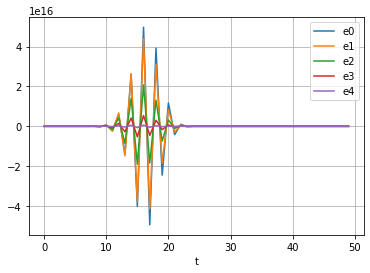

In [12]:
fig, ax = plt.subplots()#figsize=(14, 8))
#ax.set_ylim(-10, 10)
for j in range(n):
    ax.plot(ts[:50], es[j][:50], label='e'+str(j))#, color='black', linestyle="x")
#ax.set_title('errors')
#ax.grid(linestyle=":")
#ax.set_axisbelow(True)
ax.grid();
ax.set_xlabel("t")
plt.legend()
plt.show();

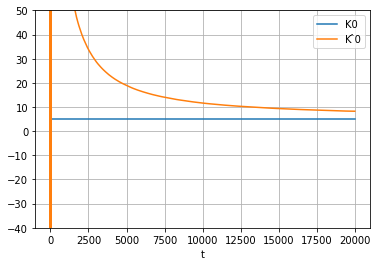

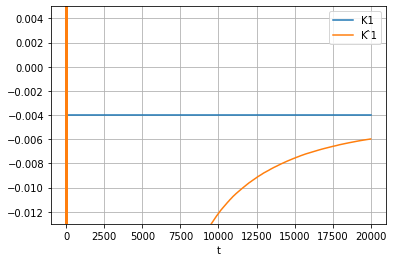

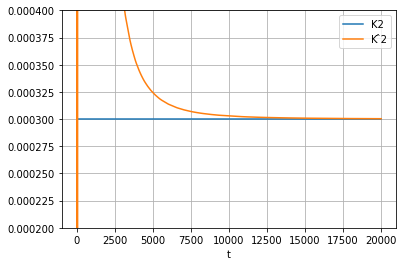

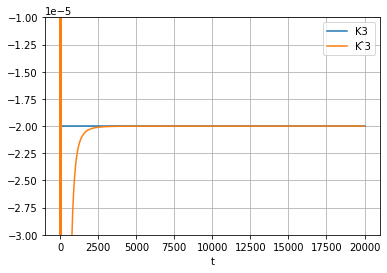

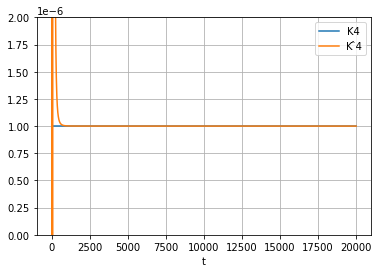

In [13]:
for j in range(n):
    fig, ax = plt.subplots()#figsize=(14, 8))
    #ax.set_ylim(-fabs(K[j])*2, fabs(K[j])*2)
    if j==0:
        x=45
        ax.set_ylim(5-x, 5+x)
    if j==1:
        x = 0.009
        ax.set_ylim(-0.004-x, -0.004+x)
    if j==2:
        x = 0.0001
        ax.set_ylim(0.0003-x, 0.0003+x)
    if j==3:
        x = 0.00001
        ax.set_ylim(-0.00002-x, -0.00002+x)
    if j==4:
        x = 0.000001
        ax.set_ylim(0.000001-x, 0.000001+x)
    ax.plot([ts[0],ts[-1]], [K[j],K[j]], label='K'+str(j))
    ax.plot(ts, ks[j], label='K ̂'+str(j))#, color='black', linestyle="x")
    #ax.set_title('koeffs')
    #ax.grid(linestyle=":")
    #ax.set_axisbelow(True)
    ax.grid();
    #ax.set_yscale('log')
    ax.set_xlabel("t")
    plt.legend()
    plt.show();